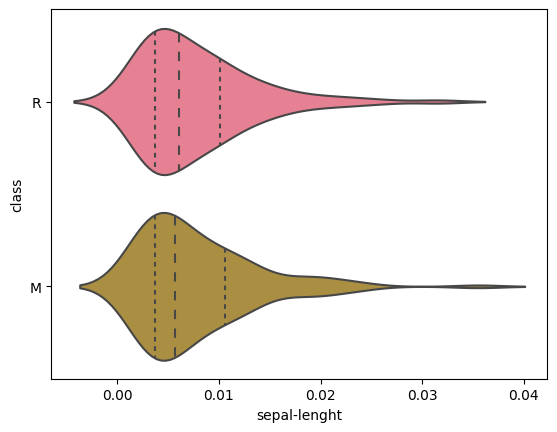

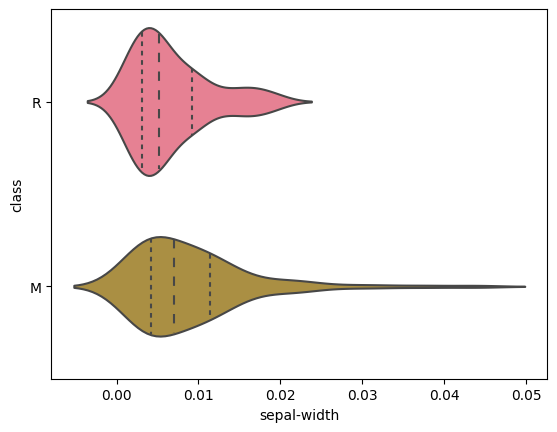

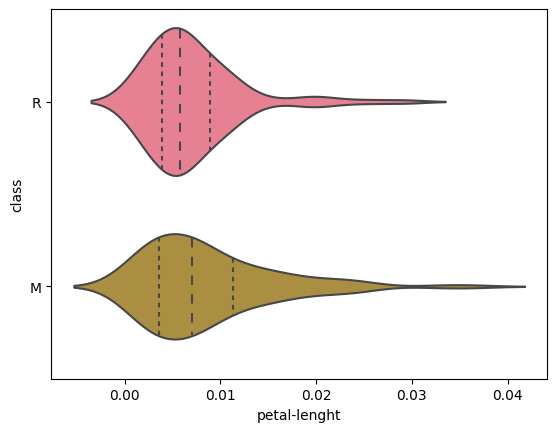

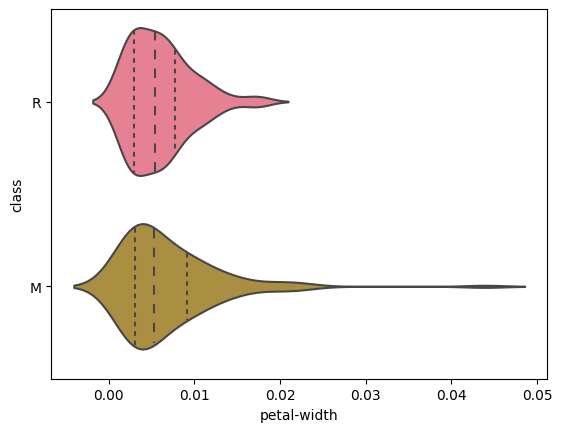

<ipython-input-1-641a22303f57>:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')


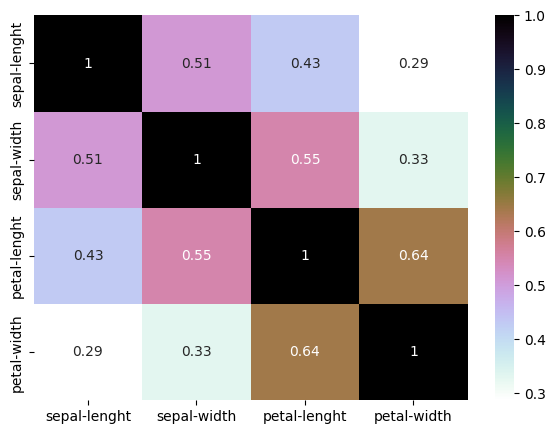

X shape: (208, 4) | y shape: (208,) 
              precision    recall  f1-score   support

           M       0.50      0.65      0.57        20
           R       0.56      0.41      0.47        22

    accuracy                           0.52        42
   macro avg       0.53      0.53      0.52        42
weighted avg       0.53      0.52      0.52        42



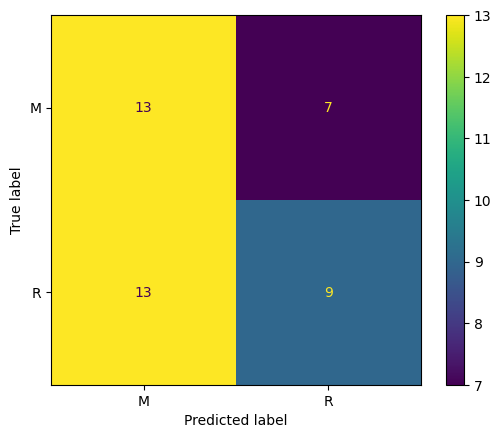

array(['M', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'R', 'M',
       'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'M', 'M',
       'M', 'R', 'M'], dtype=object)

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd   # data handling
import seaborn as sns   #visualization
sns.set_palette('husl')
import matplotlib.pyplot as plt  #visualization
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
col_name = ['sepal-lenght', 'sepal-width', 'petal-lenght', 'petal-width', 'class']
dataset = pd.read_csv(url, names = col_name)

dataset.head()
dataset.describe()



# Violin Plot
sns.violinplot(y='class', x='sepal-lenght', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal-width', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-lenght', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-width', data=dataset, inner='quartile')
plt.show()

plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')
plt.show()
# Drop the column that contains the class labels
X = dataset.drop(['class'], axis=1)
y = dataset['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

# Split: 80% for training. 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1)
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

# Model evaluation
# Predict from the test dataset
predictions = svn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, predictions, labels=svn.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svn.classes_)
disp.plot()
plt.show()

# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

with open('SVM.pickle', 'rb') as f: 
     model = pickle.load(f) 
model.predict(X_test)    



